https://en.wikipedia.org/wiki/Z-order_curve

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import sys

#%matplotlib inline
# 可旋转plot
%matplotlib notebook

In [43]:
INT_BIT = sys.getsizeof(0)

def MortonCode(x, y):
    #Interleave bits of x and y, so that all of the  
    #bits of x are in the even positions and y in the odd;  
    #z gets the resulting Morton Number.  
    z = 0
    for i in range(INT_BIT):
        z |= (x & 1 << i) << i | (y & 1 << i) << (i + 1) 
    return z

def plotScatterZ(X, Y, Z, title):
    # 定义figure
    fig = plt.figure()
    # 将figure变为3d
    ax = Axes3D(fig)
    ax.scatter(X, Y, Z, c=Z.ravel(), marker='o', s=10)
    #ax.set_zlim(0, 1)
    ax.set_title(title, alpha=0.6, color="b", size=16, weight='bold', backgroundcolor="y")
    plt.show()

[[  0.   1.   4.   5.  16.  17.  20.  21.  64.  65.]
 [  2.   3.   6.   7.  18.  19.  22.  23.  66.  67.]
 [  8.   9.  12.  13.  24.  25.  28.  29.  72.  73.]
 [ 10.  11.  14.  15.  26.  27.  30.  31.  74.  75.]
 [ 32.  33.  36.  37.  48.  49.  52.  53.  96.  97.]
 [ 34.  35.  38.  39.  50.  51.  54.  55.  98.  99.]
 [ 40.  41.  44.  45.  56.  57.  60.  61. 104. 105.]
 [ 42.  43.  46.  47.  58.  59.  62.  63. 106. 107.]
 [128. 129. 132. 133. 144. 145. 148. 149. 192. 193.]
 [130. 131. 134. 135. 146. 147. 150. 151. 194. 195.]]


<IPython.core.display.Javascript object>


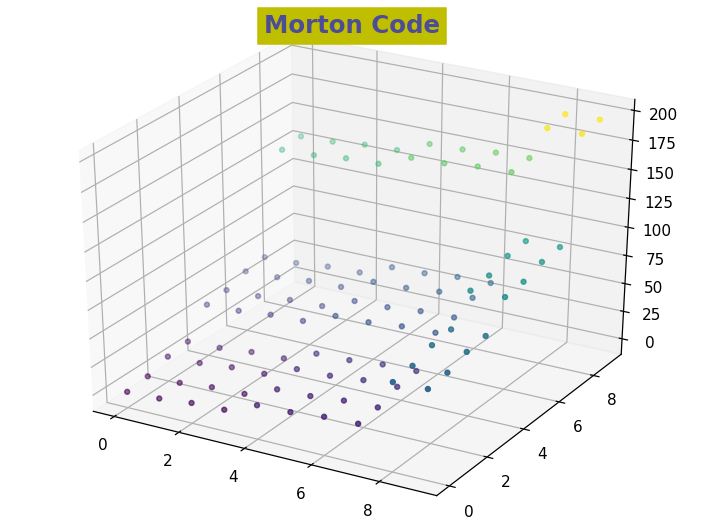

In [56]:
size = 10
Z = np.zeros((size, size))
for x in range(size):
    for y in range(size):
        Z[y][x] = MortonCode(x, y)
print(Z)

X = np.arange(size)
Y = np.arange(size)
X, Y = np.meshgrid(X, Y)

#X = X.ravel()
#Y = Y.ravel()
#Z = z.ravel()

plotScatterZ(X, Y, Z, "Morton Code")

In [62]:
i = 5
j = 3
x_i = int(Z[0][i])
x_j = int(Z[0][j])
x_i_plus_j = ((x_i | 0b10101010) + x_j) & 0b01010101
x_i_minus_j = ((x_i & 0b01010101) - x_j) & 0b01010101   #if i >= j

print("x[{0}] = {1}".format(i, x_i))
print("x[{0}] = {1}".format(j, x_j))
print("x[i + j] = {0}".format(x_i_plus_j))
print("x[i - j] = {0}".format(x_i_minus_j))

x[5] = 17
x[3] = 5
x[i + j] = 64
x[i - j] = 4


In [63]:
z = int(Z[2][2])
top    = ((z & 0b10101010) - 1 & 0b10101010) | (z & 0b01010101)
bottom = ((z | 0b01010101) + 1 & 0b10101010) | (z & 0b01010101)
left   = ((z & 0b01010101) - 1 & 0b01010101) | (z & 0b10101010)
right  = ((z | 0b10101010) + 1 & 0b01010101) | (z & 0b10101010)
print(top, bottom, left, right)

6 14 9 13


In [74]:
x1 = 2;y1 = 1
x2 = 1;y2 = 1
z_x1_y1 = int(Z[y1][x1])
z_x2_y2 = int(Z[y2][x2])
# z_sum = z[y1 + y2][x1 + x2]
z_sum = ((z_x1_y1 | 0b10101010) + (z_x2_y2 & 0b01010101) & 0b01010101) | ((z_x1_y1 | 0b01010101) + (z_x2_y2 & 0b10101010) & 0b10101010)
print("z[{0}][{1}] = {2}".format(y1, x1, z_x1_y1))
print("z[{0}][{1}] = {2}".format(y2, x2, z_x2_y2))
print("z[{0}][{1}] = {2}".format(y1 + y2, x1 + x2, z_sum))

z[1][2] = 6
z[1][1] = 3
z[2][3] = 13
